## Week 1 : Descriptive Analytics
<br>

__An Operational Decision Problem__

- How much to produce?
- We need to know or estimate the cost of the product, price of the product, and some data on the demand of the product.



Source credit:  [MOOC of Wharton school, University of pennsylvania](https://www.coursera.org/learn/wharton-operations-analytics/supplement/4QtPl/excel-files-slides-and-practice-problems)

### A fundamental operations problem
Suppose that you are making operations decisions for a retailer who orders a product from a supplier and sells it to customers
1. the ordered product items are received and placed on store shelf
2. there is a large customer population
3. you get only <span style='color:red'>one chance to order without knowing the customer demand</span>

**Costs**

You order the product from the supplier at 
> cost = \\$3/item

The product on the self sells at price
>  selling price = $12/item

All unsold items are salvaged
> salvage value = $0/item

#### Senario: demand is uncertian. Suppose you bought 10 items

- A high demand scenario: demand is 100. You will sell all 10 items and make a profit of 10*(12-3)=\\$90 
- A low demand scenario: no demaind. lose 10*3=$30


#### Operation decision: you need to decide on the number of units to order from supplier before seeing the customer demand

We have 100 periods of past demand data 

In [2]:
cost = 3
selling_price = 12
n = 100

In [44]:
import numpy as np
import pandas as pd 

demand = './doc/_dac354520da23dfcd36e839fb64cd817_DemandData.xlsx'
df = pd.read_excel(demand)
df = df [['Period', 'Demand']]
df.drop(index=0, inplace=True)

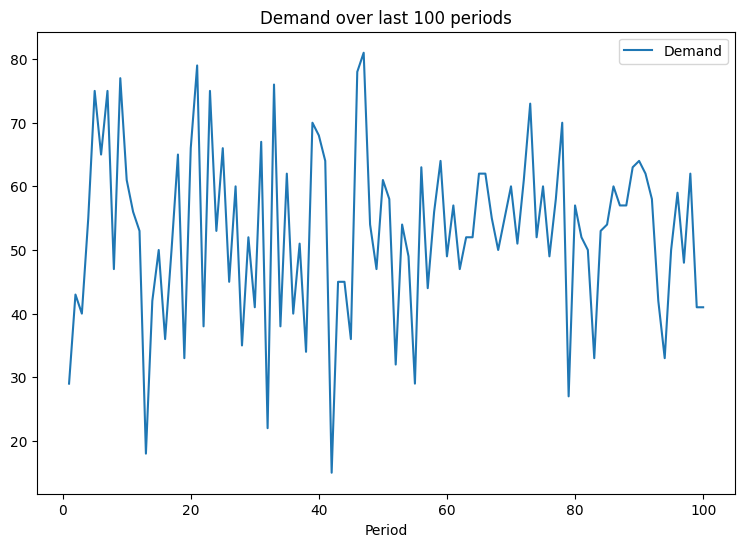

In [16]:
import matplotlib.pyplot as plt

# draw a line plot over 100 periods
df.plot(x='Period', y='Demand', title='Demand over last 100 periods', figsize=(9,6))
plt.show()

In [19]:
print('Maximum demand observed was: ',df['Demand'].max())
print('Minimum demand observed was: ',df['Demand'].min())
print('Average of 100 observations is: ', df['Demand'].mean())

Maximum demand observed was:  81.0
Minimum demand observed was:  15.0
Average of 100 observations is:  52.81


#### Question: How much would you order to maximize the profit?

A Newsvendor problem
>    you have an objective ( usually maximize profits, minimize costs, improve market share, etc. )
> 
>    you have to make one decision before you see the future demand

Demand occurs and profits and costs are realized.

#### A Business Appication at Time Inc.

Time Magazine Supply Chain:
1. stores were either selling out inventories ( too little inventory )
2. or sold only a small fraction of alocation ( too much inventory)

Time Magazine evaluated and adjusted for every issue:
1. National print order ( total number of copies printed and shipped )
2. wholesale allotment structure (how those copies are allotted to wholesalers )
3. store distribution ( final distribution to stores )

Time Magazine reports <span style='color:red'>saving $3.5M annually</span> from tackling the newsvendor problem (Koschat et al, *Interfaces*, Volume 33, No 3. May-June 2003, pages 72-84)

#### Broader Applications of the Newsvendor Problem

Governments order flu vaccines before the flu season begins, and before the extent or the nature of the flu strain is known
- How many vaccines to order?

Smart phone users buy mobile data plans before they know their actual future usage
- What is the right plan for you?

#### What makes a good forecast?

- It should be timely, reliable
- It should be as accurate as possible, and
- It should be in meaningful units
- The method should be easy to use and be understood in practice

**Example of a model of future demand: how likely is each scenario**
1. for each scenario, a likelihood of its coming true must be estimated
2. where do estimates of likelihood come from?

Suppose that after analyzing the past data and using subjective inputs, we estimate that scenarios have the following likelihoods of being realized in the next selling season:
- likelihood of "high" demand is 20%
- likelihood of "normal" demand is 70%
- likelihood of "low" demand is 10%

For example, $D_1$ = 80 with probability $p_1$ =0.2 <br>
$D_2$ = 50 with probability $p_2$ = 0.7 <br>
$D_3$ = 20 with probability $p_3$ = 0.1 

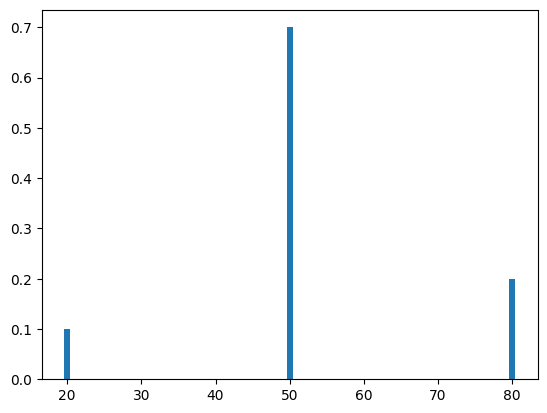

In [22]:
demands = [20, 50, 80]
probabilities = [0.1, 0.7, 0.2]

plt.bar(x=demands, height=probabilities)
plt.show()

For a discrete probability distribution, the mean is defined as a sum of the products of scenario values and their probabilities.<br>
$$\bar D = p_1D_1+p_2D_2+p_3D_3$$

Mean relects the demand value that we will get, on average, in a selling season if we keep observing the demand realizations over infinite number of selling seasons

Standard deviation describes, roughly speaking, how far away actual random variable values are from the mean, on average. In other words, it describes how, in a colloquial sense, "spread out" the distribution is around its mean

$$
SD = \sqrt{p_1*(D_1 - \bar D)^2 + p_2*(D_2 - \bar D)^2 + p_3*(D_3 - \bar D)^2} 
$$

In [42]:
discrete_mean = []
for i, j in zip(demands, probabilities):
    print(i,j)
    discrete_mean.append(i*j)
print('discrete_mean: ', sum(discrete_mean))

20 0.1
50 0.7
80 0.2
discrete_mean:  53.0


In [43]:
import math
sum_of_deviation = []
for i,j in zip(demands, probabilities):
    sum_of_deviation.append(j*(i-sum(discrete_mean))**2)
print('sum of deviation: ', sum(sum_of_deviation))
sd = math.sqrt(sum(sum_of_deviation))
print('SD: ', sd)

sum of deviation:  261.0
SD:  16.15549442140351


Forecasts should include some distribution information
- mean and standard deviation
- range (high and low)


Subjective forecasting methods
- composites
- customer surveys
- jury of executive opinion
- the delphi method

Objective forecasting methods
- causal models
- time series methods ("naive" method)

Sample Mean or Sample Average:
$$ \mu = \frac{(D_1 + D_2 + ... +D_n)}{n}$$
Sample Standard Deviation:
$$ S=\sqrt{\frac{\sum(D_t - \mu)^2}{n-1}}$$
$$t = 1, 2, ..., n$$

Stationary time series has the form:
$$D_t = \mu+\epsilon_t$$
where $\mu$ is a constant and $\epsilon_t$ is a random variable with mean 0 and some standard deviate $\sigma$


Two common methods for forecasting stationary series are
- <span style='color:red'>moving averages</span>
- and <span style='color:red'>exponential smoothing</span>

In [65]:
demands = df['Demand'].values.tolist()
# for a one-step-ahead forecast for period t
Ft = sum(demands[-12:-2])/10
MA10 = sum(demands[-11:-1])/10
MA20 = sum(demands[-21:-1])/20

Advantages of Moving Averae Method
1. easy to understand
2. easy to compute
3. provide stable forecasts

Disadvantages of Moving Average Method
1. lag behind a trend
2. it is not a causal model, i.e., it won't explain why realizations in the future behave in a certain way